# Project: TMBD Data Analysis on the popularity of movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis, we examine the dataset from The Movie Database (TMDb). This dataset contains over 10,000 movies, including user ratings and revenue.

Two questions guide this investigation:

1) Are popular films more commercially successful than unpopular films?

2) Is the running time of popular and unpopular movies changing over the decades?

In [75]:
# Set up import of packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Initially, we look at the data and draw conclusions about what changes we need to make to answer our research questions.

In [76]:
# Load data
df = pd.read_csv('tmdb-movies.csv')

In [77]:
# Number of entries and columns
df.shape

(10866, 21)

In [78]:
# Show first entries
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


For our first questions we will analyse following columns:

popularity: TMBD Metric of the associated movie based on several factors such as number of totals votes or daily user voting behavior (https://developers.themoviedb.org/3/getting-started/popularity)

budget: Cost in dollars of the of the associated movie

revenue: Earnings in dollars that were generated by of the associated movie


For our second questions we will also consider following columns:

release_year: Year in which the associated movie was released.

runtime: The length of the associated movie in minutes.

In [79]:
# Structure of entries and entries with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It seems that we have no missing data in the required columns. However, it is questionable whether all values are greater than zero.

In [80]:
# Smallest Budget
df.budget.min()

0

In [81]:
# Smallest Revenue
df.revenue.min()

0

In [82]:
# Shortest Runtime
df.runtime.min()

0

In [83]:
# Count entries with 0
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Many entries for budget, revenue and runtime have the value 0. We remove entries with 0, because we want to use real and not estimated data. However, this makes the data considerably smaller.

In [84]:
# Generate descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We will call movies popular if they have a popularity rating that is above average.

### Data Cleaning 

Now we clean the data according to the results of the previous data analysis.

In [85]:
# Drop unnecessary columns
df_pop = df.drop(columns=['id', 'imdb_id', 'cast', 'keywords', 'homepage', 'original_title', 'director', 'tagline', 'overview', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'])
df_pop.head()

,popularity,budget,revenue,runtime,release_year
0,32.985763,150000000,1513528810,124,2015
1,28.419936,150000000,378436354,120,2015
2,13.112507,110000000,295238201,119,2015
3,11.173104,200000000,2068178225,136,2015
4,9.335014,190000000,1506249360,137,2015


In [86]:
# Use replace to turn 0 into nan
df_pop.replace(0, np.nan, inplace=True)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10866 non-null float64
budget          5170 non-null float64
revenue         4850 non-null float64
runtime         10835 non-null float64
release_year    10866 non-null int64
dtypes: float64(4), int64(1)
memory usage: 424.5 KB


In [87]:
# Drop columns with nan
df_pop.dropna(subset=['budget', 'revenue', 'runtime'], inplace=True)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 5 columns):
popularity      3855 non-null float64
budget          3855 non-null float64
revenue         3855 non-null float64
runtime         3855 non-null float64
release_year    3855 non-null int64
dtypes: float64(4), int64(1)
memory usage: 180.7 KB


In [88]:
# Use applymap to change data type from float to int
columns = ['budget', 'revenue', 'runtime']
df_pop[columns] = df_pop[columns].applymap(np.int64)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 5 columns):
popularity      3855 non-null float64
budget          3855 non-null int64
revenue         3855 non-null int64
runtime         3855 non-null int64
release_year    3855 non-null int64
dtypes: float64(1), int64(4)
memory usage: 180.7 KB


In [89]:
df_pop.head()

,popularity,budget,revenue,runtime,release_year
0,32.985763,150000000,1513528810,124,2015
1,28.419936,150000000,378436354,120,2015
2,13.112507,110000000,295238201,119,2015
3,11.173104,200000000,2068178225,136,2015
4,9.335014,190000000,1506249360,137,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Are popular films more commercially successful than unpopular films?

In [90]:
# Use query to select popular and unpopular movies
mean_pop = df_pop.popularity.mean()
popular_movies = df_pop.query('popularity > {}'.format(mean_pop))
unpopular_movies = df_pop.query('popularity <= {}'.format(mean_pop))

In [91]:
# Number of popular movies
popular_movies.count()

popularity      1199
budget          1199
revenue         1199
runtime         1199
release_year    1199
dtype: int64

In [92]:
# Number of unpopular movies
unpopular_movies.count()

popularity      2656
budget          2656
revenue         2656
runtime         2656
release_year    2656
dtype: int64

In [93]:
# Use mean to calculate average budget spend on popular and unpopular movies
popular_movies_avg_budget = popular_movies.budget.mean() 
unpopular_movies_avg_budget = unpopular_movies.budget.mean() 

In [94]:
# Turn average budget for popular movies to millions
popular_movies_avg_budget_mil = popular_movies_avg_budget / 1e6
popular_movies_avg_budget_mil

62.917914623853214

In [95]:
# Turn avergae budget for unpopular movies to millions
unpopular_movies_avg_budget_mil = unpopular_movies_avg_budget / 1e6
unpopular_movies_avg_budget_mil

25.592796848644578

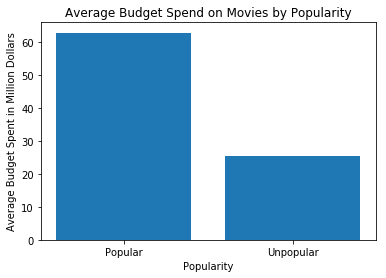

In [96]:
# Create a bar chart with proper labels for average budgets spend on popular and unpopular movies
locations = [1, 2]
heights = [popular_movies_avg_budget_mil, unpopular_movies_avg_budget_mil]
labels = ['Popular', 'Unpopular']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Budget Spend on Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Budget Spent in Million Dollars');

Popular movies seem to be more expensive than unpopular movies. On average, popular movies cost 1.5 times as much as unpopular ones, according to our data.

In [97]:
# Use mean to calculate average revenue of popular and unpopular movies
popular_movies_avg_revenue = popular_movies.revenue.mean() 
unpopular_movies_avg_revenue = unpopular_movies.revenue.mean() 

In [98]:
# Turn average revenue of popular movies to millions
popular_movies_avg_revenue_mil = popular_movies_avg_revenue / 1e6
popular_movies_avg_revenue_mil

234.41168732026691

In [99]:
#Turn average revenue of unpopular movies to millions
unpopular_movies_avg_revenue_mil = unpopular_movies_avg_revenue / 1e6
unpopular_movies_avg_revenue_mil

50.438845009412653

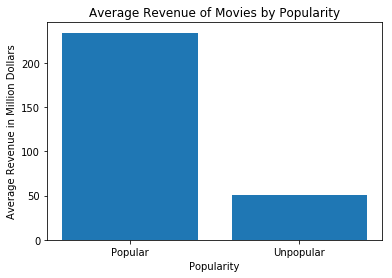

In [100]:
# Create a bar chart with proper labels for average revenues spend on popular and unpopular movies
locations = [1, 2]
heights = [popular_movies_avg_revenue_mil, unpopular_movies_avg_revenue_mil]
labels = ['Popular', 'Unpopular']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue of Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Revenue in Million Dollars');

Popular movies seem to generate significantly more revenue than unpopular movies. On average, popular movies generate 3.5 times more revenue than unpopular movies, according to our data.

In [101]:
# Calculate average profit of popular movies
popular_movies_avg_profit = popular_movies_avg_revenue - popular_movies_avg_budget
popular_movies_avg_profit

171493772.6964137

In [102]:
# Turn average profit for popular movies to millions
popular_movies_avg_profit_mil = popular_movies_avg_profit / 1e6
popular_movies_avg_profit_mil

171.49377269641369

In [103]:
# Calculate average profit of unpopular movies
unpopular_movies_avg_profit = unpopular_movies_avg_revenue - unpopular_movies_avg_budget
unpopular_movies_avg_profit

24846048.160768077

In [104]:
# Turn average profit of unpopular movies to millions
unpopular_movies_avg_profit_mil = unpopular_movies_avg_profit / 1e6
unpopular_movies_avg_profit_mil

24.846048160768078

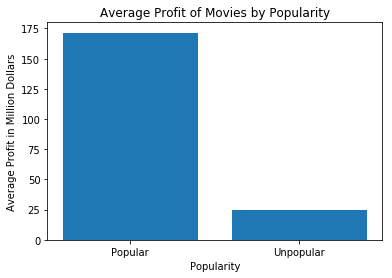

In [105]:
# Create a bar chart with proper labels for profits of popular and unpopular movies
locations = [1, 2]
heights = [popular_movies_avg_profit_mil, unpopular_movies_avg_profit_mil]
labels = ['Popular', 'Unpopular']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Profit of Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit in Million Dollars');

Popular movies seem to be significantly more profitable than unpopular movies. On average, popular films generate 6 times as much profit as unpopular films. However, unpopular movies are still profitable on average - at least according to our data.

### Is the running time of popular and unpopular movies changing over the decades?

In [106]:
# Year of the oldest popular movie
popular_movies.release_year.min()

1960

In [107]:
# Year of the newest popular movie
popular_movies.release_year.max()

2015

In [108]:
# Use query to classy popular movies in decades
decade_60s_pop = popular_movies.query('release_year <= 1969')
decade_70s_pop = popular_movies.query('release_year <= 1979')
decade_80s_pop = popular_movies.query('release_year <= 1989')
decade_90s_pop = popular_movies.query('release_year <= 1999')
decade_00s_pop = popular_movies.query('release_year <= 2009')
decade_10s_pop = popular_movies.query('release_year <= 2015')

In [109]:
# Use mean to determine average runtime of popular movies in every decade
runtime_60s_pop = decade_60s_pop.runtime.mean()
runtime_70s_pop = decade_70s_pop.runtime.mean()
runtime_80s_pop = decade_80s_pop.runtime.mean()
runtime_90s_pop = decade_90s_pop.runtime.mean()
runtime_90s_pop = decade_00s_pop.runtime.mean()
runtime_10s_pop = decade_10s_pop.runtime.mean()

In [110]:
#average runtime of popular movies in the 60s
runtime_60s_pop 

122.57894736842105

In [111]:
#average runtime of popular movies in the 10s
runtime_10s_pop

113.84820683903253

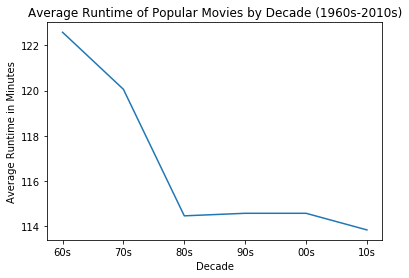

In [112]:
# Create a bar chart with proper labels for runtime of popular movies by decade
x = [1, 2, 3, 4, 5, 6]
y = [runtime_60s_pop, runtime_70s_pop, runtime_80s_pop, runtime_90s_pop, runtime_90s_pop, runtime_10s_pop]
labels = ['60s', '70s', '80s', '90s', '00s', '10s']
plt.plot(x, y)
plt.title('Average Runtime of Popular Movies by Decade (1960s-2010s)')
plt.xlabel('Decade')
plt.xticks(x, labels)
plt.ylabel('Average Runtime in Minutes');

According to our data, the running time of popular films decreases by about 10min from the 1960s to the 1980s, but then remains at a constant level of about 115min until the 1980s.

In [113]:
# Year of the oldest unpopular movie
unpopular_movies.release_year.min()

1960

In [114]:
# Year of the newest unpopular movie
unpopular_movies.release_year.max()

2015

In [115]:
# Use query to classy unpopluar movies in decades
decade_60s_unpop = unpopular_movies.query('release_year <= 1969')
decade_70s_unpop = unpopular_movies.query('release_year <= 1979')
decade_80s_unpop = unpopular_movies.query('release_year <= 1989')
decade_90s_unpop = unpopular_movies.query('release_year <= 1999')
decade_00s_unpop = unpopular_movies.query('release_year <= 2009')
decade_10s_unpop = unpopular_movies.query('release_year <= 2015')

In [116]:
# Use mean to determine average runtime of unpopular movies in every decade
runtime_60s_unpop = decade_60s_unpop.runtime.mean()
runtime_70s_unpop = decade_70s_unpop.runtime.mean()
runtime_80s_unpop = decade_80s_unpop.runtime.mean()
runtime_90s_unpop = decade_90s_unpop.runtime.mean()
runtime_90s_unpop = decade_00s_unpop.runtime.mean()
runtime_10s_unpop = decade_10s_unpop.runtime.mean()

In [117]:
# Average runtime of unpopular movies in the 60s
runtime_60s_unpop

137.26923076923077

In [118]:
# Average runtime of unpopular movies in the 10s
runtime_10s_unpop

107.1246234939759

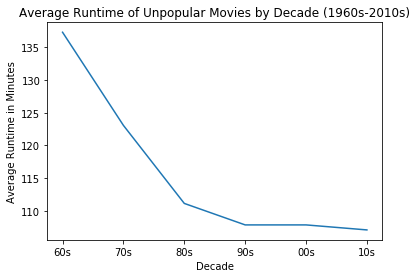

In [119]:
# Create a bar chart with proper labels for runtime of unpopular movies by decade
x = [1, 2, 3, 4, 5, 6]
y = [runtime_60s_unpop, runtime_70s_unpop, runtime_80s_unpop, runtime_90s_unpop, runtime_90s_unpop, runtime_10s_unpop]
labels = ['60s', '70s', '80s', '90s', '00s', '10s']
plt.plot(x, y)
plt.title('Average Runtime of Unpopular Movies by Decade (1960s-2010s)')
plt.xlabel('Decade')
plt.xticks(x, labels)
plt.ylabel('Average Runtime in Minutes');

From the 1960s to the 1980s, according to our data, the running time of unpopular films decreases by about 30min and remains at a constant level of about 110min from the 1990s.

<a id='conclusions'></a>
## Conclusions

### Limitations

Due to the small amount of data and data cleaning decisions, these results must be considered preliminary and not fully representative. A major obstacle in the evaluation of the data was that for the columns budget and sales the data was not missing, but for many entries only 0 was given. From a total of 10866 entries, we could therefore only consider 4850 entries. Since the differences in budget and revenue between popular and unpopular movies are very large, replacing the zero values with an average might have aligned the values of popular movies and unpopular movies too closely. Thus, since we wanted to work with real data rather than estimated data, the amount of data to consider was consequently much smaller. However, omitting budget and revenue entries with a value of 0 may have changed the ratio of the total number of popular and unpopular films compared to the baseline data and may have affected the results.


### Are popular films more commercially successful than unpopular films?

Yes, popular films are more commercially successful than unpopular films. Whether a film is commercially successful seems to depend heavily on its popularity. Popular films cost 1.5 times as much as unpopular films, but generate 3.5 times more revenue and 6 times more profit. 


### Is the running time of popular and unpopular movies changing over the decades?

Yes, the running time of popular and unpopular films actually decreases over the decades (1960s - 2010s). A similar trend can be observed for both sorts of films: In the first 2-3 decades, the running times decrease, but then settle at a constant level in the following. While popular films become only 10 minutes shorter over the decades, the running time of unpopular films decreases by 30 minutes. As a result, unpopular films, which were significantly longer than popular films at the beginning of the time period, are now shorter than their counterparts at the end of the observation window. However, the difference in running time between popular and unpopular films is only 5 minutes in the 10s.

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0